# Fyttlyf Data Science Team Test Solution

## Part 0: Reading the data

In [1]:
# import the needed libraries 
import pandas as pd

In [2]:
data_path = 'Fytlyff_DS_Interview.csv'

# read the dataset as a DataFrame
dataset = pd.read_csv(data_path)

dataset.head()   # show the first 5 rows from our dataset

,Year,Month,MobileWeb_or_Web,Type_of_Customers?,Where_Are_They_comming_from?,Which_Place_in_India?,How_many_Landed_on_our_Page?,How_many_Landed_on_the_our_Page_and_clicked_on_a_button?,How_many_Landed_on_the_our_Page_and_clicked_on_a_button_and_started_filling_the_Form?,How_many_Landed_on_the_our_Page_and_clicked_on_a_button_and_started_filling_the_Form_and_Completed_and_submited_the_form?
0,2019,Jan,Desktop_Website,Existing_Customer,Came_From_Google,Bangalore,NaN,NaN,56892,17178
1,2019,Jan,Desktop_Website,Existing_Customer,Came_From_Google,Chennai,NaN,NaN,41460,11916
2,2019,Jan,Desktop_Website,Existing_Customer,Came_From_Google,Dehradun,NaN,NaN,55561,19461
3,2019,Jan,Desktop_Website,Existing_Customer,Came_From_Google,Indore,NaN,NaN,320923,110667
4,2019,Jan,Desktop_Website,Existing_Customer,Came_From_Google,Pune,NaN,NaN,220937,46033


### Variables and their description for Fyttlyf DS Interview Test 

We see that our data has 2160 rows (cases) and 10 columns (features), The columns, their data type and their description are shown in the table below: 

| Variable |         Type        |        Description               |
|----------|---------------------|----------------------------------|
|   Year (A)  | Numerical (Discrete)| The year when the customer comming |
| Month   (B) | Categorical (Nominal) | The month when the customer comming |
| MobileWeb_or_Web (C) | Categorical (Nominal) | The service requested by the customer |
| Type_of_Customers? (D) | Categorical (Nominal) | The customer status | 
| Where_Are_They_comming_from? (E) | Categorical (Nominal) | The company/organization where the customer comming from|
| Which_Place_in_India? (F) | Categorical (Nominal) | Customer city |
| How_many_Landed_on_our_Page? (G) | Numerical (Discrete) | Number of our page visits | 
| How_many_Landed_on_the_our_Page_and_clicked_on_a_button? (H) | Numerical (Discrete) | Number of clicks on a button when landing the page|
| How_many_Landed_on_the_our_Page_and_clicked_on_a_button_and_started_filling_the_Form? (I) | Numerical (Discrete) | Number of clicks on a button when landing the page and filling the form |
| How_many_Landed_on_the_our_Page_and_clicked_on_a_button_and_started_filling_the_Form_and_Completed_and_submited_the_form? (J) | Numerical (Discrete) |  Number of clicks on a button when landing the page and filling the form and completed and submitted the form|



## Part 1: Data cleaning

In [3]:
def data_cleaning(dataframe):
    """
    This function will perform the following:
        1. Replace the NA values with 0s in the data
        2. In column ‘B’ replace Jan with 1, feb with 2, march with 3 and so on…
        3. In column ‘E’ Replace “Came_From_Google” with “Google” and “Landed_on_the_page_Directly” with “Direct_traffic”
            
    Parameters:
        dataframe (dataFrame): The DataFrame of the dataset we used
    
    Returns
        df (dataFrame): The cleaned data frame 
    
    """
    df = dataframe.copy(deep=True)    # get a copy of the dataframe
    
    # renaming columns
    df.columns = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J']
    
    # get the columns that have NaN values 
    null_series = df.isnull().any()    # check if there is any missing across each column  
    nan_cols = []    # to save the columns that have nan values 
    for col, val in null_series.iteritems():
        if val:
            nan_cols.append(col)
            
    # replace the nan values with zeros in the dataset 
    # Note: (by exploring the data we know that the nan values are only in the numerical data)
    for nan_col in nan_cols:
        df[nan_col].fillna(0, inplace=True)
        
    # replace months with numbers
    months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    nums = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
    df['B'] = df['B'].replace(months, nums)
    
    # replace “Came_From_Google” with “Google” and “Landed_on_the_page_Directly” with “Direct_traffic”
    old_vals = ['Came_From_Google', 'Landed_on_the_page_Directly']
    new_vals = ['Google', 'Direct_traffic']
    df['E'] = df['E'].replace(old_vals, new_vals)
    
    df.columns = dataframe.columns
    # print(dataframe.columns)
        
    return df


In [4]:
# cleaning_data(dataset)
cleaned_data = data_cleaning(dataset)
cleaned_data.head()

,Year,Month,MobileWeb_or_Web,Type_of_Customers?,Where_Are_They_comming_from?,Which_Place_in_India?,How_many_Landed_on_our_Page?,How_many_Landed_on_the_our_Page_and_clicked_on_a_button?,How_many_Landed_on_the_our_Page_and_clicked_on_a_button_and_started_filling_the_Form?,How_many_Landed_on_the_our_Page_and_clicked_on_a_button_and_started_filling_the_Form_and_Completed_and_submited_the_form?
0,2019,1,Desktop_Website,Existing_Customer,Google,Bangalore,0.0,0.0,56892,17178
1,2019,1,Desktop_Website,Existing_Customer,Google,Chennai,0.0,0.0,41460,11916
2,2019,1,Desktop_Website,Existing_Customer,Google,Dehradun,0.0,0.0,55561,19461
3,2019,1,Desktop_Website,Existing_Customer,Google,Indore,0.0,0.0,320923,110667
4,2019,1,Desktop_Website,Existing_Customer,Google,Pune,0.0,0.0,220937,46033


## Part 2: Descriptive statistics

In [5]:
def descriptive_stats(dataframe):
    """
    Generates the summary statistics (Mean, Median, Quartile, standard deviation) 
    of all the numerical columns
    Produce a list of all the unique values & data types present in the non-numeric columns
    
    Parameters:
        dataframe (dataFrame): The cleaned DataFrame of the dataset we used
    
    Returns
        summary_stat (dataFrame): A dataframe contains the summary statistics of the numerical data
        unique_vals (list): A list of all the unique values in the categorical data and their data type 
    """
    
    df = dataframe.copy(deep=True)    # get a copy of the dataframe
    
    # Generate the summary 
    summary_stat = df.describe() 
    
    # get the unique values of the non-numeric columns
    unique_vals = []  
    for col, val in df.iteritems():
        if col not in summary_stat.columns:
            unique_vals.append([col, df[col].unique()])            

    return summary_stat, unique_vals


In [6]:
summary_statstics, unique_values = descriptive_stats(cleaned_data)

In [7]:
summary_statstics

,Year,Month,How_many_Landed_on_our_Page?,How_many_Landed_on_the_our_Page_and_clicked_on_a_button?,How_many_Landed_on_the_our_Page_and_clicked_on_a_button_and_started_filling_the_Form?,How_many_Landed_on_the_our_Page_and_clicked_on_a_button_and_started_filling_the_Form_and_Completed_and_submited_the_form?
count,2160.000000,2160.000000,2.160000e+03,2.160000e+03,2.160000e+03,2.160000e+03
mean,2020.000000,6.500000,3.922474e+05,1.792281e+05,1.510725e+05,5.922129e+04
std,0.816686,3.452852,9.555773e+05,3.951562e+05,2.353538e+05,8.646564e+04
min,2019.000000,1.000000,0.000000e+00,0.000000e+00,3.761000e+03,7.660000e+02
25%,2019.000000,3.750000,0.000000e+00,0.000000e+00,3.360800e+04,1.157725e+04
50%,2020.000000,6.500000,1.228350e+04,4.212500e+03,7.064950e+04,2.700450e+04
75%,2021.000000,9.250000,3.816422e+05,1.730452e+05,1.659590e+05,7.185350e+04
max,2021.000000,12.000000,1.127413e+07,4.079301e+06,3.022858e+06,1.251258e+06


In [8]:
unique_values

[['MobileWeb_or_Web',
  array(['Desktop_Website', 'Mobile_website'], dtype=object)],
 ['Type_of_Customers?',
  array(['Existing_Customer', 'New_Customer'], dtype=object)],
 ['Where_Are_They_comming_from?',
  array(['Google', 'Direct_traffic', 'Unidentified_Sources'], dtype=object)],
 ['Which_Place_in_India?',
  array(['Bangalore', 'Chennai', 'Dehradun', 'Indore', 'Pune'], dtype=object)]]

## Part 3: Prescriptive statistics

### 1. “Which_Place_in_India?” has the highest “How_many_Landed_on_the_our_Page?”

In [9]:
cond_df = cleaned_data.loc[cleaned_data["How_many_Landed_on_our_Page?"] == cleaned_data["How_many_Landed_on_our_Page?"].max()]

cond_df

,Year,Month,MobileWeb_or_Web,Type_of_Customers?,Where_Are_They_comming_from?,Which_Place_in_India?,How_many_Landed_on_our_Page?,How_many_Landed_on_the_our_Page_and_clicked_on_a_button?,How_many_Landed_on_the_our_Page_and_clicked_on_a_button_and_started_filling_the_Form?,How_many_Landed_on_the_our_Page_and_clicked_on_a_button_and_started_filling_the_Form_and_Completed_and_submited_the_form?
984,2020,5,Desktop_Website,New_Customer,Direct_traffic,Pune,11274131.0,2544078.0,658397,389191


In [10]:
place = cond_df["Which_Place_in_India?"]
place

984    Pune
Name: Which_Place_in_India?, dtype: object

In [11]:
print(f'The place in India which has the highest number of page visits is {place[984]}')

The place in India which has the highest number of page visits is Pune


### 2. “How_many_Landed_on_the_our_Page_and_clicked_on_a_button_and_started_filling_the_Form_and_Completed_and_submited_the_form?” divided by “How_many_Landed_on _our_Page?” is highest for “Which_Place_in_India?”

Before exploring this values, we know that the “How_many_Landed_on _our_Page?” column has 0 values which lead to infinty when finding the percentage of “How_many_Landed_on_the_our_Page_and_clicked_on_a_button_and_started_filling_the_Form_and_Completed_and_submited_the_form?” from “How_many_Landed_on _our_Page?”. Thus, we need to fill 0s with more reasonable value, we can use the mean, the median, mode, KNN or MICE methods to handle these missing values  

#### First we will explore filling data with the mean 

In [12]:
# renaming columns to make it easier while using
cleaned_data.columns = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'] 

In [13]:
mean_df = cleaned_data.copy(deep=True)

mean = mean_df['G'].mean()

# change 0s with the mean
mean_df['G'].replace(0, mean, inplace=True)

# get the percentage
mean_df['Percentage_submit_landed'] = mean_df['J'] / mean_df['G']
# mean_df.head()

# # get the rows that have the max percentage
high_percent_rows_mean = mean_df.loc[mean_df['Percentage_submit_landed'] == mean_df['Percentage_submit_landed'].max()] 
high_percent_mean = high_percent_rows_mean['Percentage_submit_landed'][high_percent_rows_mean.index[0]] * 100
place_mean = high_percent_rows_mean["F"][high_percent_rows_mean.index[0]]

print(f'{place_mean} has the highest percentage of submitted forms which is {high_percent_mean}')

Dehradun has the highest percentage of submitted forms which is 61.8403568548801


#### Second, We will explore filling data with the median

In [14]:
median_df = cleaned_data.copy(deep=True)

median = median_df['G'].median()

if median < median_df['J'].max():
    print("This is not reasonable to have submitted forms greater than the number od visits of the page")
    
else:
    # change 0s with the median value
    median_df['G'].replace(0, median, inplace=True)

    # get the percentage
    median_df['Percentage_submit_landed'] = median_df['J'] / median_df['G']
#     median_df.head()

    # get the rows that have the max percentage
    high_percent_rows_median = median_df.loc[median_df['Percentage_submit_landed'] == median_df['Percentage_submit_landed'].max()]
#     high_percent_rows_median
    high_percent_median = high_percent_rows_median['Percentage_submit_landed'][high_percent_rows_median.index[0]] * 100
    place_median = high_percent_rows_median["F"][high_percent_rows_median.index[0]]

    print(f'{place_median} has the highest percentage of submitted forms which is {high_percent_median}')

This is not reasonable to have submitted forms greater than the number od visits of the page


By exploring filling the null data in “How_many_Landed_on _our_Page?” by the median value, we found that there are some cases who submitted the form but doesn't land on the page (number of submissions > number of visits), which is not reasonable in this case. Thus, we cannot handle this with the median value.

#### Third, We will explore filling data with the mode

In [15]:
mode_df = cleaned_data.copy(deep=True)

mode = mode_df['G'].mode()

if mode[0] == 0: 
    print("The mode for this feature is 0, It's not useful for handling missing values")
    
else:
    # change 0s with the median value
    mode_df['G'].replace(0, mode, inplace=True)

    # get the percentage
    mode_df['Percentage_submit_landed'] = mode_df['J'] / mode_df['G']
#     mode_df.head()

    # get the rows that have the max percentage
    high_percent_rows_mode = mode_df.loc[mode_df['Percentage_submit_landed'] == mode_df['Percentage_submit_landed'].max()]
#     high_percent_rows_mode
    high_percent_mode = high_percent_rows_mode['Percentage_submit_landed'][high_percent_rows_mode.index[0]] * 100
    place_mode = high_percent_rows_mode["F"][high_percent_rows_mode.index[0]]

    print(f'{place_mode} has the highest percentage of submitted forms which is {high_percent_mode}')

The mode for this feature is 0, It's not useful for handling missing values


#### Fourth, We will explore filling data using KNN imputer 

In [16]:
from sklearn.impute import KNNImputer
import numpy as np

In [17]:
knn_df = cleaned_data.copy(deep=True)

imputer = KNNImputer(missing_values=0, n_neighbors=5)    # initiate the imputer 
g = np.array(knn_df['G']).reshape(-1, 1)
df_filled = imputer.fit_transform(g)    # Fill the missing values in G 

knn_df['G'] = df_filled

# get the percentage
knn_df['Percentage_submit_landed'] = knn_df['J'] / knn_df['G']

# # get the rows that have the max percentage
high_percent_rows_knn = knn_df.loc[knn_df['Percentage_submit_landed'] == knn_df['Percentage_submit_landed'].max()] 
high_percent_knn = high_percent_rows_knn['Percentage_submit_landed'][high_percent_rows_knn.index[0]] * 100
place_knn = high_percent_rows_knn["F"][high_percent_rows_knn.index[0]]

print(f'{place_knn} has the highest percentage of submitted forms which is {high_percent_knn}')

Dehradun has the highest percentage of submitted forms which is 61.8403568548801


We notice that the KNN method gives the same result as when using the mean 

## Part 4: Simple Machine learning questions

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error

In [19]:
def create_date_frame(dataframe):
    date_frame = dataframe.copy(deep=True)
    
    date_frame['Date'] = pd.to_datetime(date_frame.A.astype(str) + '/' + date_frame.B.astype(str) + '/01')
    
    date_frame['Time'] = np.arange(len(date_frame.index)) # create time dummies for training 
    
    return date_frame

In [20]:
df = cleaned_data.copy(deep=True)
df = create_date_frame(cleaned_data)

X = df.loc[:, 'Time'].to_numpy() # x_train 
y = df.loc[:, 'J'].to_numpy()    # y_train

df.head()

,A,B,C,D,E,F,G,H,I,J,Date,Time
0,2019,1,Desktop_Website,Existing_Customer,Google,Bangalore,0.0,0.0,56892,17178,2019-01-01,0
1,2019,1,Desktop_Website,Existing_Customer,Google,Chennai,0.0,0.0,41460,11916,2019-01-01,1
2,2019,1,Desktop_Website,Existing_Customer,Google,Dehradun,0.0,0.0,55561,19461,2019-01-01,2
3,2019,1,Desktop_Website,Existing_Customer,Google,Indore,0.0,0.0,320923,110667,2019-01-01,3
4,2019,1,Desktop_Website,Existing_Customer,Google,Pune,0.0,0.0,220937,46033,2019-01-01,4


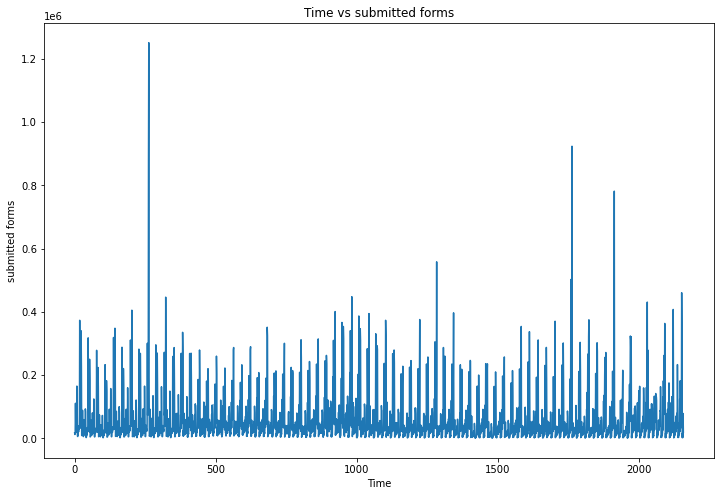

In [21]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12, 8))

plt.plot(X, y)

# Set the title
plt.title("Time vs submitted forms")
# Set the y-axis label
plt.ylabel('submitted forms')
# Set the x-axis label
plt.xlabel('Time')
plt.show()

In [23]:

def pred_future(X_train, y_train):
    """
    Predicts “How_many_Landed_on_the_our_Page_and_clicked_on_a_button_and_started_filling_the_Form_and_Completed_and_submited_the_form?” 
    for the complete year of 2022
    and generates the overall MAPE of your prediction for the year 2021.
    """
    linear_model = LinearRegression()
    linear_model.fit(X_train.reshape(-1,1), y_train)
    
    b = linear_model.intercept_
    w = linear_model.coef_
    
    # predictions for 2022 
    x_test_2022 = np.arange(2160, 2880)
    y_pred_2022 = linear_model.predict(x_test_2022.reshape(-1,1))
    
    # predictions for 2021 
    x_test_2021 = X_train[1439:]
    y_pred_2021 = linear_model.predict(x_test_2021.reshape(-1,1))
    mape_2021 = mean_absolute_percentage_error(y_train[1439:], y_pred_2021)
    
    return y_pred_2022, mape_2021

y_pred_2022, mape_2021 = pred_future(X, y)

print(f'predictions for the complete year 2022:\n {y_pred_2022}')
print(f'MAPE of 2021 predictions: {MAPE}')


predictions for the complete year 2022:
 [58005.47020183 58004.34496258 58003.21972334 58002.0944841
 58000.96924485 57999.84400561 57998.71876637 57997.59352713
 57996.46828788 57995.34304864 57994.2178094  57993.09257015
 57991.96733091 57990.84209167 57989.71685243 57988.59161318
 57987.46637394 57986.3411347  57985.21589545 57984.09065621
 57982.96541697 57981.84017773 57980.71493848 57979.58969924
 57978.46446    57977.33922075 57976.21398151 57975.08874227
 57973.96350303 57972.83826378 57971.71302454 57970.5877853
 57969.46254605 57968.33730681 57967.21206757 57966.08682833
 57964.96158908 57963.83634984 57962.7111106  57961.58587135
 57960.46063211 57959.33539287 57958.21015363 57957.08491438
 57955.95967514 57954.8344359  57953.70919666 57952.58395741
 57951.45871817 57950.33347893 57949.20823968 57948.08300044
 57946.9577612  57945.83252196 57944.70728271 57943.58204347
 57942.45680423 57941.33156498 57940.20632574 57939.0810865
 57937.95584726 57936.83060801 57935.70536877 5

NameError: name 'MAPE' is not defined

## Part 5: Visualization

A line graph for “How_many_Landed_on_the_our_Page_and_clicked_on_a_button?” for the different “Which_Place_in_India?” over the months of the year 2019 & 2020. 

(Hint : On x axis there should be months for 2019 & 2020 and Y axis should be the “How_many_Landed_on_the_our_Page_and_clicked_on_a_button?” and there should different lines depicting different regions of “Which_Place_in_India?”)


In [24]:
vis_df = cleaned_data.copy(deep=True)

months_2019_2020 = vis_df[(vis_df['A'] == 2019) | (vis_df['A'] == 2020)]  # get 2019 and 2020 from data 

months_2019_2020.head()

,A,B,C,D,E,F,G,H,I,J
0,2019,1,Desktop_Website,Existing_Customer,Google,Bangalore,0.0,0.0,56892,17178
1,2019,1,Desktop_Website,Existing_Customer,Google,Chennai,0.0,0.0,41460,11916
2,2019,1,Desktop_Website,Existing_Customer,Google,Dehradun,0.0,0.0,55561,19461
3,2019,1,Desktop_Website,Existing_Customer,Google,Indore,0.0,0.0,320923,110667
4,2019,1,Desktop_Website,Existing_Customer,Google,Pune,0.0,0.0,220937,46033


From the unique values, we know that we have 5 different places in indea:'Bangalore', 'Chennai', 'Dehradun', 'Indore', 'Pune', do we will make a dataframe for each for ease use 

In [25]:
Bangalore = months_2019_2020[months_2019_2020['F'] == 'Bangalore']
Bangalore = create_date_frame(Bangalore)

Chennai = months_2019_2020[months_2019_2020['F'] == 'Chennai']
Chennai = create_date_frame(Chennai)


Dehradun = months_2019_2020[months_2019_2020['F'] == 'Dehradun']
Dehradun = create_date_frame(Dehradun)

Indore = months_2019_2020[months_2019_2020['F'] == 'Indore']
Indore = create_date_frame(Indore)

Pune = months_2019_2020[months_2019_2020['F'] == 'Pune']
Pune = create_date_frame(Pune)


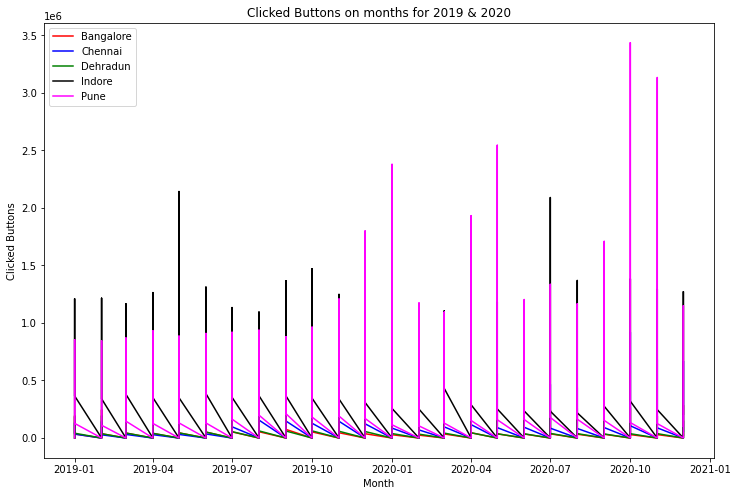

In [26]:
fig = plt.figure(figsize=(12, 8))

plt.plot(Bangalore['Date'], Bangalore['H'], color='red', label='Bangalore')
plt.plot(Chennai['Date'], Chennai['H'], color='blue', label='Chennai')
plt.plot(Dehradun['Date'], Dehradun['H'], color='green', label='Dehradun')
plt.plot(Indore['Date'], Indore['H'], color='black', label='Indore')
plt.plot(Pune['Date'], Pune['H'], color='magenta', label='Pune')


plt.title('Clicked Buttons on months for 2019 & 2020')
plt.xlabel('Month')
plt.ylabel('Clicked Buttons')

plt.legend()

plt.show()

A line graph of the actual and projected number of “How_many_Landed_on_the_our_Page_and_clicked_on_a_button_and_started_filling_the_Form_and_Completed_and_submited_the_form?” for the months of the year 2021(Actuals values) & 2022 (Predicted values). (Hint : It should be a line graph)

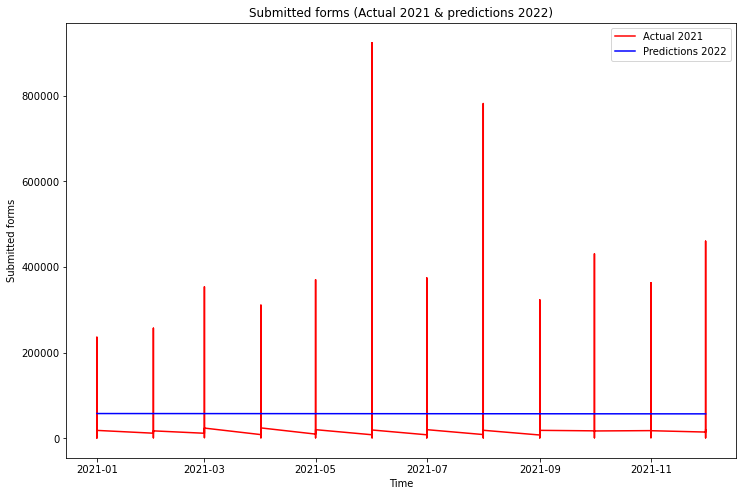

In [27]:
fig = plt.figure(figsize=(12, 8))

actual_2021 = y[1440:]
plt.plot(df.loc[1440:, 'Date'], actual_2021, color='red', label='Actual 2021')

predicted_2022 = y_pred_2022
plt.plot(df.loc[1440:, 'Date'], predicted_2022, color='blue', label='Predictions 2022')

plt.title('Submitted forms (Actual 2021 & predictions 2022)')
plt.xlabel('Time')
plt.ylabel('Submitted forms')

plt.legend()

plt.show()

## Part 6: About the previous projects

1. Investigating Netflix Movies and Guest Stars in The Office Project

This project is just for data analysis. In this project, We invistigated Netflix Movies to get insights about the duration of the movies. We appplied EDA on two categories:
    1. On friend's data: given the average duartions movie during the period from 2011 to 2020.
    2. On a dataset for Netflix that contains large samples of the movies, tv shows, ...etc. during the period from 1925 to 2021, and of different genres.
We also gained experience in Exploratory Data Analysis, allowing us to manipulate raw data, "Netflix data", and draw conclusions based on the visualizations of the data we created. 

GitHub: https://github.com/raniaelhagin/Data-Analysis-Projects-and-Excercises-/tree/main/Investigating_Netflix_Movies_and_Guest_Stars_in_The_Office

2. Dr.Semmelweis and the Discovery of Handwashing

Also this project was in data analysis. This project is about reanalyzing the data behind one of the most important discoveries of modern medicine, handwashing, and how it was a major cause of childbed fever and by enforcing handwashing, hundreds of lives were saved.

This project have many topics such as Case Studying, Data Manipulation, Data Visualization, Probability and Statistics.

GitHub: https://github.com/raniaelhagin/Data-Analysis-Projects-and-Excercises-/tree/main/Dr._Semmelweis_and_the_Discovery_of_Handwashing

3. Prediction using supervised ML

This project was about using linear regression to predict student scores based on their study hours. I used linear regression using a from scratch approach and in another solution I used Scikit-learn.
I explored the data and get the relationship between the features. And this project was in The Sparks Foudation Internship, I also will do more projects with them as soon as poossible. 

GitHub: https://github.com/raniaelhagin/Data-Science-and-Business-analytics-Internship-TSF-GRIP/tree/main/Projects

## Part 7: Time management

If I get selected in this full-time internship, I will try to manage my time as I have a job in company. 
Usually I work all the day but if I have a task I will give it more concentration in time, I mean I concentrate in the task all the time I have until I finish my work. 
I can spend over 10 hours working on a task. always taking notes and define the problem I work on save a lot of time and help me manage my thought. So, taking time at the first for taking notes, define our problem, and have an initial thought about how I will manage and prioritize tasks, and be aware of the deadlines to get the solutions save me a lot of time and organize my work. 